Data Mining_Homework 2

In [113]:
#libraries
from sklearn.datasets import make_circles
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Creating and exploring data

In [114]:
X, y = make_circles(n_samples=3000, shuffle=True, noise=0.05, factor=0.3)
print(X.shape)
print(y.shape)

# spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3000, 2)
(3000,)
(2010, 2)
(2010,)
(990, 2)
(990,)


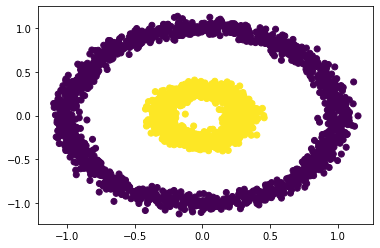

In [115]:
plt.scatter(X[:,0], X[:,1], c = y)

Part1: No activation function

In [116]:
#create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,input_dim=2, kernel_initializer='uniform'),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(1)
])

model.summary()

# compile model
model.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=['accuracy'])

# fit model
result = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, verbose = 0)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 16)                48        
                                                                 
 dense_83 (Dense)            (None, 8)                 136       
                                                                 
 dense_84 (Dense)            (None, 8)                 72        
                                                                 
 dense_85 (Dense)            (None, 1)                 9         
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


In [117]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('test accuracy:', test_acc)

31/31 - 0s - loss: 0.6993 - accuracy: 0.5697 - 66ms/epoch - 2ms/step
test accuracy: 0.5696969628334045


In [119]:
def plot_acc(result):
  plt.plot(result.history['accuracy'])
  plt.plot(result.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])

def plot_loss(result):
  plt.plot(result.history['loss'])
  plt.plot(result.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])

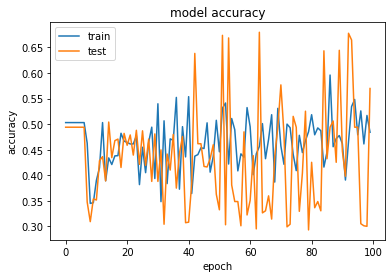

In [120]:
plot_acc(result)

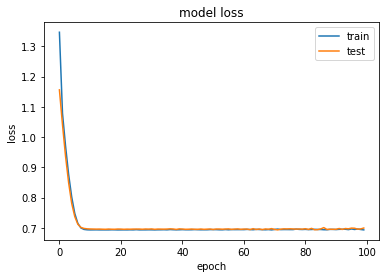

In [121]:
plot_loss(result)

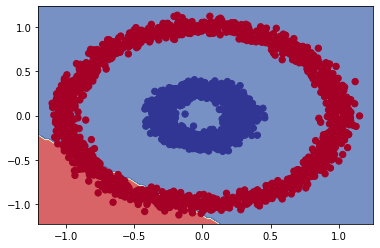

In [122]:
def plot_decision(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
  x_in = np.c_[xx.ravel(), yy.ravel()] 

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
     y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
     y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

plot_decision(model, X, y)

**Part 2**


---


تابع فعال‌ساز خطی به مدل اضافه می‌کنیم

In [123]:
#create model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(16,input_dim=2, kernel_initializer='uniform', activation='linear'),
    tf.keras.layers.Dense(8, activation='linear'),
    tf.keras.layers.Dense(8, activation='linear'),
    tf.keras.layers.Dense(1, activation='linear')
])

model2.summary()

# compile model
model2.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=['accuracy'])

# fit model
result2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, verbose = 0)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 16)                48        
                                                                 
 dense_87 (Dense)            (None, 8)                 136       
                                                                 
 dense_88 (Dense)            (None, 8)                 72        
                                                                 
 dense_89 (Dense)            (None, 1)                 9         
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


In [124]:
test_loss, test_acc = model2.evaluate(X_test,  y_test, verbose=2)
print('test accuracy:', test_acc)

31/31 - 0s - loss: 0.6950 - accuracy: 0.5222 - 53ms/epoch - 2ms/step
test accuracy: 0.5222222208976746


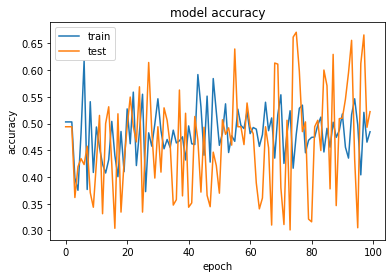

In [125]:
plot_acc(result2)

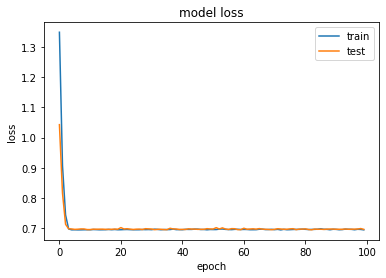

In [126]:
plot_loss(result2)

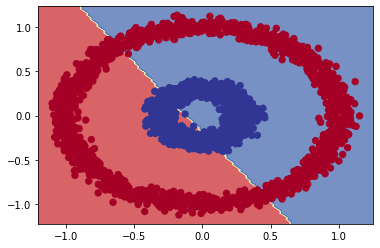

In [127]:
plot_decision(model2, X, y)

**Part 3**


---

Modifying loss function for regression

In [128]:
#create model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(16,input_dim=2, kernel_initializer='uniform', activation='linear'),
    tf.keras.layers.Dense(8, activation='linear'),
    tf.keras.layers.Dense(8, activation='linear'),
    tf.keras.layers.Dense(1, activation='linear')
])

model3.summary()

# compile model
model3.compile(loss=keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=['accuracy'])

# fit model
result3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, verbose = 0)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 16)                48        
                                                                 
 dense_91 (Dense)            (None, 8)                 136       
                                                                 
 dense_92 (Dense)            (None, 8)                 72        
                                                                 
 dense_93 (Dense)            (None, 1)                 9         
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


In [129]:
test_loss, test_acc = model3.evaluate(X_test,  y_test, verbose=2)
print('test accuracy:', test_acc)

31/31 - 0s - loss: 0.5172 - accuracy: 0.6677 - 145ms/epoch - 5ms/step
test accuracy: 0.6676767468452454


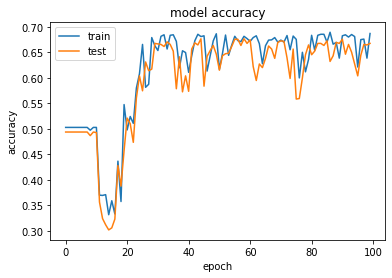

In [130]:
plot_acc(result3)

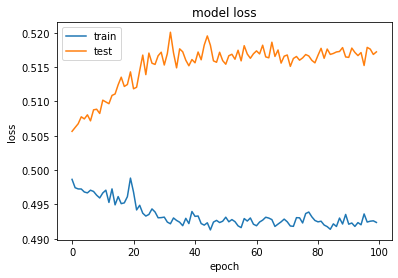

In [131]:
plot_loss(result3)

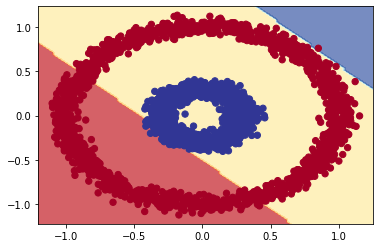

In [132]:
plot_decision(model3, X, y)

Part 4


---

One Layer Network

with non-linear activation function

In [133]:
#create model
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(16,input_dim=2, kernel_initializer='uniform', activation='relu'),
    #output layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model4.summary()

# compile model
model4.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=['accuracy'])

# fit model
result4 = model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, verbose = 0)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 16)                48        
                                                                 
 dense_95 (Dense)            (None, 1)                 17        
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [134]:
test_loss, test_acc = model4.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

31/31 - 0s - loss: 0.0014 - accuracy: 1.0000 - 65ms/epoch - 2ms/step

Test accuracy: 1.0


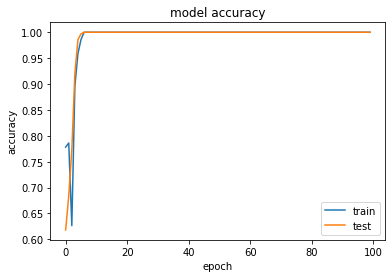

In [135]:
plot_acc(result4)

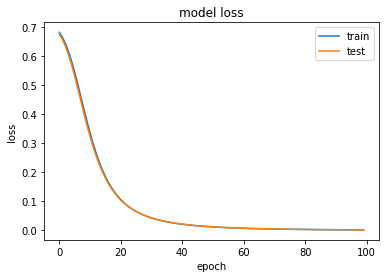

In [136]:
plot_loss(result4)

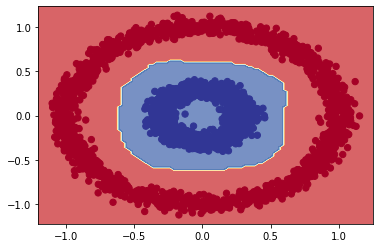

In [137]:
plot_decision(model4, X, y)

with linear activation function

In [138]:
#create model
model42 = tf.keras.Sequential([
    tf.keras.layers.Dense(16,input_dim=2, kernel_initializer='uniform', activation='linear'),
    #output layer
    tf.keras.layers.Dense(1, activation='linear')
])

model42.summary()

# compile model
model42.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=['accuracy'])

# fit model
result42 = model42.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, verbose = 0)

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 16)                48        
                                                                 
 dense_97 (Dense)            (None, 1)                 17        
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [139]:
test_loss, test_acc = model42.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

31/31 - 0s - loss: 0.6945 - accuracy: 0.3495 - 54ms/epoch - 2ms/step

Test accuracy: 0.34949496388435364


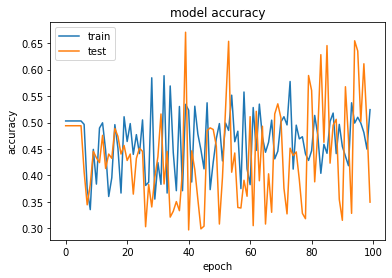

In [140]:
plot_acc(result42)

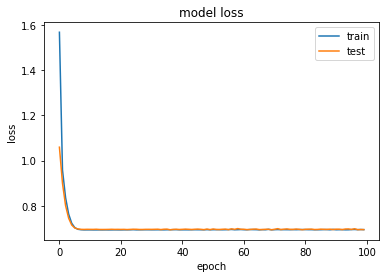

In [141]:
plot_loss(result42)

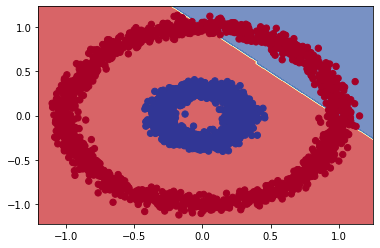

In [142]:
plot_decision(model42, X, y)

Part 5


---


choosing learning rate

learning rate = 1

In [143]:
#create model
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(16,input_dim=2, kernel_initializer='uniform', activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# model5.summary()

# compile model
model5.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(1), 
              metrics=['accuracy'])

# fit model
result5 = model5.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, verbose = 0)

In [145]:
test_loss, test_acc = model5.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

31/31 - 0s - loss: 0.6999 - accuracy: 0.5061 - 83ms/epoch - 3ms/step

Test accuracy: 0.5060606002807617


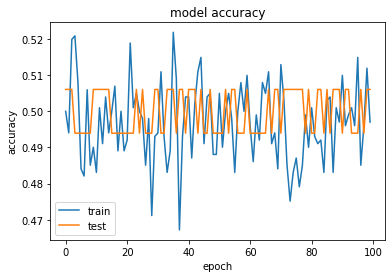

In [146]:
plot_acc(result5)

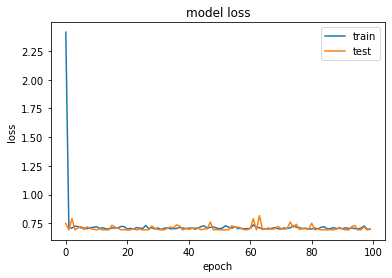

In [147]:
plot_loss(result5)

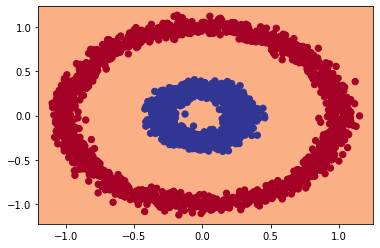

In [148]:
plot_decision(model5, X, y)

learning rate = 0.0000001

In [153]:
#create model
model52 = tf.keras.Sequential([
    tf.keras.layers.Dense(16,input_dim=2, kernel_initializer='uniform', activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# model5.summary()

# compile model
model52.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(0.0000001), 
              metrics=['accuracy'])

# fit model
result52 = model52.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, verbose = 0)

In [154]:
test_loss, test_acc = model52.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

31/31 - 0s - loss: 0.6925 - accuracy: 0.4899 - 51ms/epoch - 2ms/step

Test accuracy: 0.4898989796638489


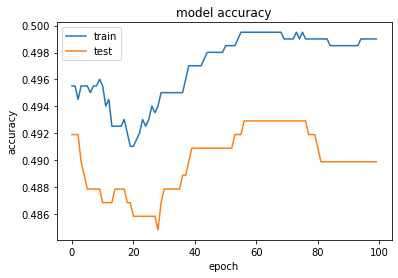

In [155]:
plot_acc(result52)

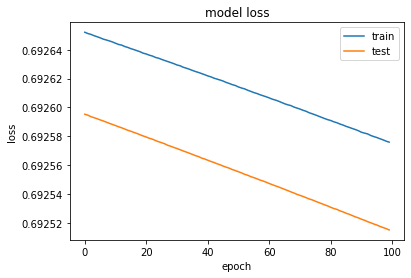

In [156]:
plot_loss(result52)

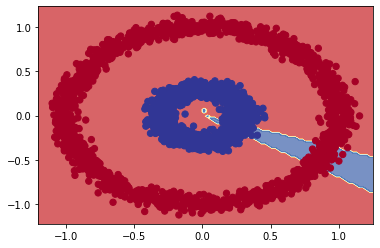

In [157]:
plot_decision(model52, X, y)

learning rate = 0.0001

In [158]:
model53 = tf.keras.Sequential([
    tf.keras.layers.Dense(16,input_dim=2, kernel_initializer='uniform', activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# model5.summary()

# compile model
model53.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(0.0001), 
              metrics=['accuracy'])

# fit model
result53 = model53.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, verbose = 0)

In [159]:
test_loss, test_acc = model53.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

31/31 - 0s - loss: 0.0081 - accuracy: 1.0000 - 59ms/epoch - 2ms/step

Test accuracy: 1.0


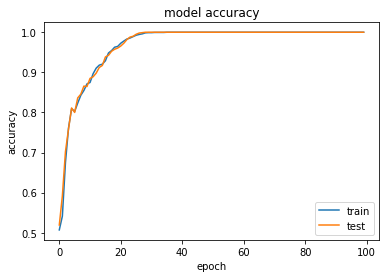

In [160]:
plot_acc(result53)

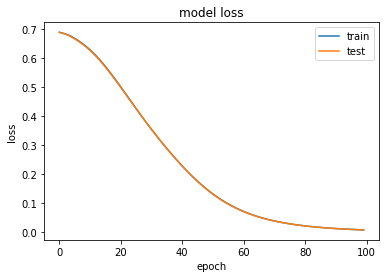

In [161]:
plot_loss(result53)

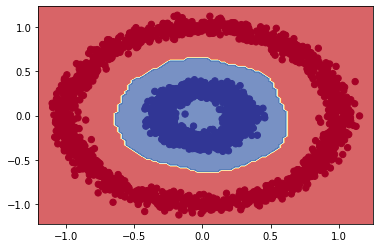

In [162]:
plot_decision(model53, X, y)

Part 6


---

Designing our own model


In [87]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(16,input_dim=2, kernel_initializer='uniform', activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model6.summary()

# compile model
model6.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(0.001), 
              metrics=['accuracy'])

# fit model
result6 = model6.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, verbose = 0)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 16)                48        
                                                                 
 dense_76 (Dense)            (None, 8)                 136       
                                                                 
 dense_77 (Dense)            (None, 8)                 72        
                                                                 
 dense_78 (Dense)            (None, 4)                 36        
                                                                 
 dense_79 (Dense)            (None, 1)                 5         
                                                                 
Total params: 297
Trainable params: 297
Non-trainable params: 0
_________________________________________________________________


In [88]:
test_loss, test_acc = model6.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

31/31 - 0s - loss: 7.1464e-06 - accuracy: 1.0000 - 56ms/epoch - 2ms/step

Test accuracy: 1.0


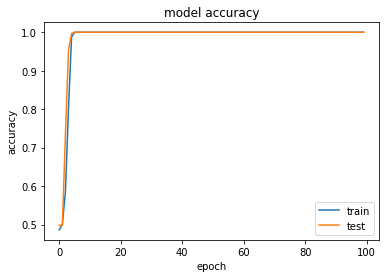

In [89]:
plot_acc(result6)

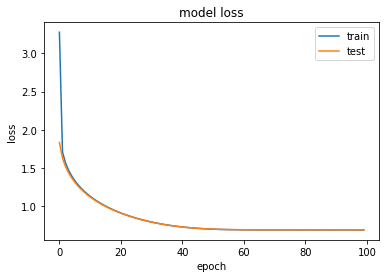

In [90]:
plot_loss(result5)

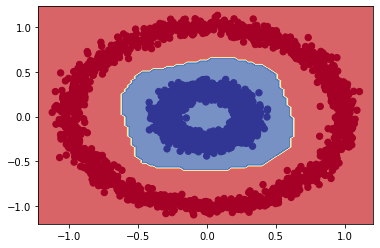

In [91]:
plot_decision(model6, X, y)




---



---



---

Question 2


---


---



---




In [163]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix

In [168]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [169]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#normalizing
train_images = train_images / 255.0
test_images = test_images / 255.0

In [170]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [171]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [172]:
result_f = model.fit(train_images, train_labels, epochs=10, verbose = 0)

In [173]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('test accuracy:', test_acc)

313/313 - 1s - loss: 0.3394 - accuracy: 0.8838 - 553ms/epoch - 2ms/step
test accuracy: 0.8838000297546387


Confusion Matrix

In [174]:
predictions = model.predict(test_images)
matrix = confusion_matrix(test_labels, predictions.argmax(axis=1))
print(matrix)

[[798   1  10  27   5   2 143   0  14   0]
 [  4 967   1  20   5   0   2   0   1   0]
 [ 11   0 723  13 152   0  96   1   4   0]
 [ 13   5   8 903  32   0  32   0   7   0]
 [  1   0  61  29 850   1  51   1   6   0]
 [  0   0   0   1   0 966   0  16   0  17]
 [ 85   1  56  31  66   1 744   0  16   0]
 [  0   0   0   0   0  22   0 953   0  25]
 [  4   0   0   4   1   3   2   6 980   0]
 [  0   0   0   0   0   6   1  39   0 954]]


Using external libararies to show confusion matrix (not necessary)

fatal: destination path 'ssp19ai_utils' already exists and is not an empty directory.
Already up to date.
Confusion matrix


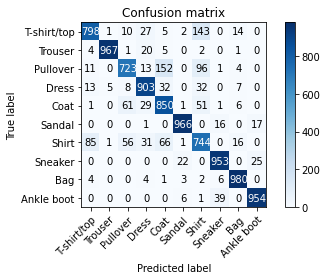

In [175]:
!git clone https://github.com/liady/ssp19ai_utils.git
!git -C ssp19ai_utils pull
import ssp19ai_utils.utils as utils
import importlib
importlib.reload(utils)
predicted_classes = utils.label_with_highest_prob(predictions)
utils.plot_confusion_matrix(y_pred=predicted_classes, y_true=test_labels, classes=np.array(class_names))